In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

In [2]:
!unzip /content/drive/MyDrive/CovidDataset.zip

Archive:  /content/drive/MyDrive/CovidDataset.zip
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Cov

# Importing required modules

In [17]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
print('Imported Successfully!')
import matplotlib.pyplot as plt

Imported Successfully!


# Loading the dataset

In [9]:
#Create a Imagegenerator object to process the images


train_datagen = image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = image.ImageDataGenerator(rescale = 1./255)


#Load dataset

train_generator = train_datagen.flow_from_directory('/content/CovidDataset/Train', target_size=(224,224), batch_size=32, class_mode="binary")

val_generator = train_datagen.flow_from_directory('/content/CovidDataset/Val', target_size=(224,224), batch_size=32, class_mode="binary")

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


# Model architecture

In [8]:

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_2 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                 

# Model Training

In [11]:
hist = model.fit(train_generator, epochs=20, validation_data=val_generator, validation_steps=2)

Epoch 1/20
7/7 [==============================] - 12s 2s/step - loss: 0.2427 - accuracy: 0.9018 - val_loss: 0.2051 - val_accuracy: 0.9500
Epoch 2/20
7/7 [==============================] - 11s 2s/step - loss: 0.1792 - accuracy: 0.9286 - val_loss: 0.1323 - val_accuracy: 0.9167
Epoch 3/20
7/7 [==============================] - 11s 2s/step - loss: 0.1162 - accuracy: 0.9732 - val_loss: 0.1382 - val_accuracy: 0.9167
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 0.1117 - accuracy: 0.9732 - val_loss: 0.0699 - val_accuracy: 0.9833
Epoch 5/20
7/7 [==============================] - 11s 2s/step - loss: 0.2290 - accuracy: 0.9196 - val_loss: 0.1597 - val_accuracy: 0.9500
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.1346 - accuracy: 0.9464 - val_loss: 0.1425 - val_accuracy: 0.9500
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.0850 - accuracy: 0.9821 - val_loss: 0.0977 - val_accuracy: 0.9667
Epoch 8/20
7/7 [====================

In [12]:
hist

In [13]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

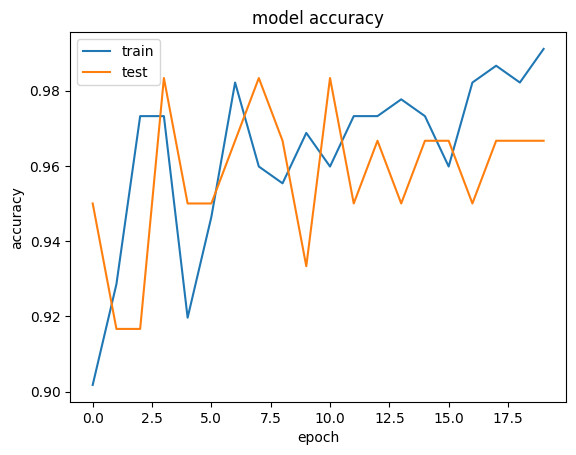

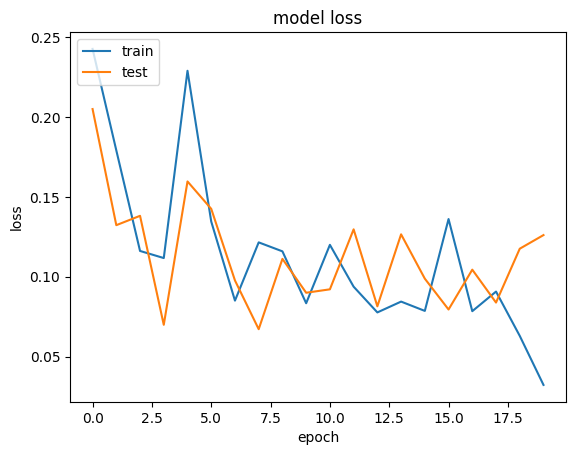

In [18]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()